In [1]:
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
start_date = datetime.today().date() - timedelta(31)
end_date = str(datetime.today().date())

In [3]:
# Define the ticker symbols
ticker_symbols = ['AAPL', 'MSFT', 'GOOGL']

# Download data for multiple tickers
data = yf.download(ticker_symbols, start=start_date, end=end_date)



[*********************100%%**********************]  3 of 3 completed


In [4]:
data.head()

Price        Adj Close                               Close              \
Ticker            AAPL       GOOGL        MSFT        AAPL       GOOGL   
Date                                                                     
2024-07-08  227.820007  189.029999  466.239990  227.820007  189.029999   
2024-07-09  228.679993  188.979996  459.540009  228.679993  188.979996   
2024-07-10  232.979996  191.179993  466.250000  232.979996  191.179993   
2024-07-11  227.570007  185.570007  454.700012  227.570007  185.570007   
2024-07-12  230.539993  185.070007  453.549988  230.539993  185.070007   

Price                         High                                 Low  \
Ticker            MSFT        AAPL       GOOGL        MSFT        AAPL   
Date                                                                     
2024-07-08  466.239990  227.850006  190.169998  467.700012  223.250000   
2024-07-09  459.540009  229.399994  191.360001  467.329987  226.369995   
2024-07-10  466.250000  233.080002  191.750000  466.459991  229.250000   
2024-07-11  454.700012  232.389999  190.860001  464.779999  225.770004   
2024-07-12  453.549988  232.639999  187.110001  456.359985  228.679993   

Price                                     Open                          \
Ticker           GOOGL        MSFT        AAPL       GOOGL        MSFT   
Date                                                                     
2024-07-08  187.779999  464.459991  227.089996  189.899994  466.549988   
2024-07-09  188.720001  458.000000  227.929993  190.309998  467.000000   
2024-07-10  189.029999  458.859985  229.300003  189.149994  461.220001   
2024-07-11  185.080002  451.549988  231.389999  189.850006  462.980011   
2024-07-12  184.490005  450.649994  228.919998  185.080002  454.329987   

Price         Volume                      
Ticker          AAPL     GOOGL      MSFT  
Date                                      
2024-07-08  59085900  21035900  12962300  
2024-07-09  48076100  15121400  17207200  
2024-07-10  62627700  15952500  18196100  
2024-07-11  64710600  25625800  23111200  
2024-07-12  53046500  22898400  16324300

In [10]:
data.index.strftime('%Y-%m-%d')

Index(['2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12',
       '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18', '2024-07-19',
       '2024-07-22', '2024-07-23', '2024-07-24', '2024-07-25', '2024-07-26',
       '2024-07-29', '2024-07-30', '2024-07-31', '2024-08-01', '2024-08-02',
       '2024-08-05', '2024-08-06', '2024-08-07'],
      dtype='object', name='Date')

In [51]:
def make_plots(Ticker, Company):
    """
    Ticker: Select from  - Adj Close, Close, High, Low, Open
    Company: Select from - AAPL, GOOGL, MSFT
    """
    data[(Ticker,Company)].plot()

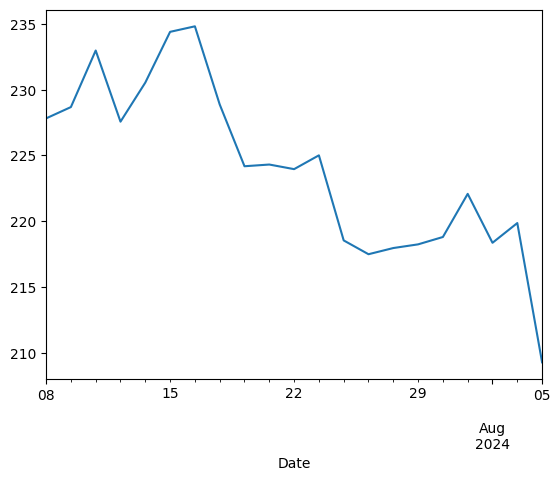

In [52]:
make_plots('Adj Close', 'AAPL')

In [5]:
from dash import Dash, html, dash_table, dcc, Output, Input, callback
import pandas as pd
import plotly.express as px

In [6]:
selected_data = pd.DataFrame(data[('Close','AAPL')])
selected_data.columns = ['_'.join(col).strip() for col in selected_data.columns.values]

In [7]:
selected_data.columns

Index(['Close_AAPL'], dtype='object')

In [77]:
data[('Close', 'AAPL')]

Date
2024-07-08    227.820007
2024-07-09    228.679993
2024-07-10    232.979996
2024-07-11    227.570007
2024-07-12    230.539993
2024-07-15    234.399994
2024-07-16    234.820007
2024-07-17    228.880005
2024-07-18    224.179993
2024-07-19    224.309998
2024-07-22    223.960007
2024-07-23    225.009995
2024-07-24    218.539993
2024-07-25    217.490005
2024-07-26    217.960007
2024-07-29    218.240005
2024-07-30    218.800003
2024-07-31    222.080002
2024-08-01    218.360001
2024-08-02    219.860001
2024-08-05    209.270004
Name: (Close, AAPL), dtype: float64

In [15]:
fig = px.line(data, y = data[('Close', 'AAPL')].values)

fig.update_layout(yaxis_title = 'Close AAPL')

In [30]:
import pandas as pd

# Sample data
arrays = [
    ['A', 'A', 'B', 'B'],
    ['X', 'Y', 'X', 'Y']
]
index = pd.MultiIndex.from_arrays(arrays, names=('Category', 'Subcategory'))

df = pd.DataFrame({
    'Value': [10, 15, 20, 25]
}, index=index)

df

Value
Category Subcategory       
A        X               10
         Y               15
B        X               20
         Y               25

In [88]:
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


# Initialize the Dash app
# app = dash.Dash(__name__)

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = Dash(external_stylesheets=external_stylesheets)

data_copy = data.copy().round(2)
data_copy.columns = [' - '.join(col).strip() for col in data_copy.columns.values]

# Layout of the app
app.layout = html.Div([
    html.Div(className='row', children='Stock Market Chart Comparison',
             style={'textAlign': 'center', 'color': 'blue', 'fontSize': 25}),

    html.Div(children=[
        html.Div(className='six columns', children=[
            dash_table.DataTable(data=data_copy.to_dict('records'))
        ]),

        html.Div([
            dcc.Dropdown(
                id='category-dropdown',
                options=[{'label': col, 'value': col} for col in ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']],
                value='Adj Close',  # Default value
                style={'width': '48%', 'display': 'inline-block'}
            ),
            dcc.Dropdown(
                id='subcategory-dropdown',
                options=[{'label': company, 'value': company} for company in ['AAPL', 'GOOGL', 'MSFT']],
                value='AAPL',  # Default value
                style={'width': '48%', 'display': 'inline-block'}
            ),
            dcc.Graph(id='graph')
        ], className='six columns')
    ])
])

# Callback to update the graph based on dropdown selections
@app.callback(
    Output('graph', 'figure'),
    [Input('category-dropdown', 'value'),
     Input('subcategory-dropdown', 'value')]
)
def update_graph(selected_category, selected_subcategory):
    fig = make_subplots(rows = 2, cols = 1)
    filtered_df = (data[(selected_category,selected_subcategory)])
    # print(filtered_df)
    # fig = px.line(filtered_df, y = filtered_df.values)
    # fig.update_layout(yaxis_title = selected_category +' - '+ selected_subcategory)
    fig.add_trace(go.Scatter(x = filtered_df.index, y = filtered_df.values), row = 1, col=1)
    fig.add_trace(go.Histogram(x = filtered_df.values), row = 2, col=1)
    fig.update_layout(height = 600)
    # fig = px.line(filtered_df, x='Category', y='Value', title=f'Values for Category {selected_category} and Subcategory {selected_subcategory}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [75]:
data# Import packages
from dash import Dash, html, dash_table
import pandas as pd

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=10)
]

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [64]:
fig = make_subplots(rows = 2, cols = 1)
filtered_df = data[('Close','AAPL')]

fig.add_trace(go.Scatter(x = filtered_df.index, y = filtered_df.values), row = 1, col=1)

In [61]:
filtered_df.index

DatetimeIndex(['2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11',
               '2024-07-12', '2024-07-15', '2024-07-16', '2024-07-17',
               '2024-07-18', '2024-07-19', '2024-07-22', '2024-07-23',
               '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-29',
               '2024-07-30', '2024-07-31', '2024-08-01', '2024-08-02',
               '2024-08-05'],
              dtype='datetime64[ns]', name='Date', freq=None)